# Solution Engineering#

In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

# importing packages and setting up evaluation dataframe

In [3]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

# importing housing data for Melbourne from mid 2016-early 2018 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


   ## Clean data frame without NAN or missing values ##

In [6]:
new_df = df.dropna(axis = 0, how = 'any', inplace =False)

# dropping any rows with any missing NAN value

In [7]:
new_df.info()

# dataset reduced to 8887 observations vs 34857 in original dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtit

In [8]:
pd.options.display.float_format = "{:.2f}".format
new_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00
mean,3.10,1092901.63,11.20,3111.66,3.08,1.65,1.69,523.48,149.31,1965.75,-37.80,144.99,7475.94
std,0.96,679381.90,6.81,112.61,0.97,0.72,0.98,1061.32,87.93,37.04,0.09,0.12,4375.02
min,1.00,131000.00,0.00,3000.00,0.00,1.00,0.00,0.00,0.00,1196.00,-38.17,144.42,249.00
25%,2.00,641000.00,6.40,3044.00,2.00,1.00,1.00,212.00,100.00,1945.00,-37.86,144.92,4382.50
50%,3.00,900000.00,10.20,3084.00,3.00,2.00,2.00,478.00,132.00,1970.00,-37.80,145.00,6567.00
75%,4.00,1345000.00,13.90,3150.00,4.00,2.00,2.00,652.00,180.00,2000.00,-37.75,145.06,10331.00
max,12.00,9000000.00,47.40,3977.00,12.00,9.00,10.00,42800.00,3112.00,2019.00,-37.41,145.53,21650.00


## Treating dataset for outliers in Price ##

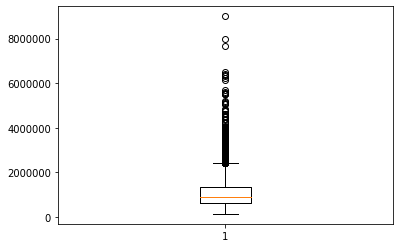

In [9]:
plt.boxplot(new_df["Price"])
plt.show()

#Box plot shows presence of outliers 

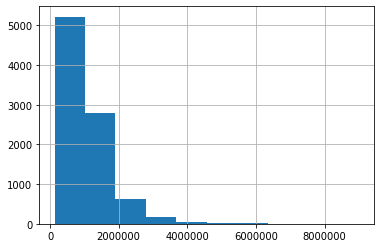

In [10]:
new_df.Price.hist()

# histogram confirming outliers 

In [11]:
print(new_df['Price'].skew())
new_df['Price'].describe()

# calculating skew in Price as is basis

2.4113965483321715


count      8887.00
mean    1092901.63
std      679381.90
min      131000.00
25%      641000.00
50%      900000.00
75%     1345000.00
max     9000000.00
Name: Price, dtype: float64

In [12]:
q1 = new_df['Price'].quantile(0.25)
q3 = new_df['Price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-3*iqr
fence_high = q3+3*iqr
df_out = new_df.loc[(new_df['Price'] > fence_low) &(new_df['Price'] < fence_high)]


# Dropping ~ 1% of observations or 97 observations

In [13]:
print(df_out['Price'].skew())
df_out['Price'].describe()

# reduced skewness in Price

1.3522467625740107


count      8790.00
mean    1056463.34
std      577049.32
min      131000.00
25%      640000.00
50%      890000.00
75%     1325000.00
max     3450000.00
Name: Price, dtype: float64

## parsing date into 2 seperate columns - month and year - to be used for importing  benchmark bond yield dataset## 

In [14]:
df_out['year_of_sale'] = df_out['Date'].astype(str)
df_out['year_of_sale']

# creating new column with date/year

2         4/02/2016
4         4/03/2017
6         4/06/2016
11        7/05/2016
14        8/10/2016
            ...    
34847    24/02/2018
34849    24/02/2018
34853    24/02/2018
34854    24/02/2018
34856    24/02/2018
Name: year_of_sale, Length: 8790, dtype: object

In [15]:
df_out['month_of_sale'] = df_out['year_of_sale'].str[:-5]
df_out['month_of_sale'] 

2         4/02
4         4/03
6         4/06
11        7/05
14        8/10
         ...  
34847    24/02
34849    24/02
34853    24/02
34854    24/02
34856    24/02
Name: month_of_sale, Length: 8790, dtype: object

In [16]:
df_out['month'] = df_out['month_of_sale'].str[-2:]
df_out['month']


# splitting out the month

2        02
4        03
6        06
11       05
14       10
         ..
34847    02
34849    02
34853    02
34854    02
34856    02
Name: month, Length: 8790, dtype: object

In [17]:
df_out['year'] = df_out['year_of_sale'].str[-4:]

#converting date/year to year 

In [18]:
df_out['monthyear'] = pd.to_datetime(df_out[['year', 'month']].assign(Day=1))

#creating a new monthyear column in case required for further analysis

In [19]:
df_out.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year_of_sale,month_of_sale,month,year,monthyear
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/02/2016,4/02,02,2016,2016-02-01
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/03/2017,4/03,03,2017,2017-03-01
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/06/2016,4/06,06,2016,2016-06-01
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,...,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,7/05/2016,7/05,05,2016,2016-05-01
14,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,...,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,8/10/2016,8/10,10,2016,2016-10-01


In [20]:
df_out_clean = df_out.drop(columns =['Date','Type','Address','CouncilArea','Postcode', 'Lattitude', 'Longtitude', 'SellerG','Method','month_of_sale','year_of_sale'], axis=1)

# dropping irrelevant columns like Type, Address, Council Area, Postcode etc.

In [21]:
df_out_clean.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear
2,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01
4,Abbotsford,3,1465000.00,2.50,3.00,2.00,0.00,134.00,150.00,1900.00,Northern Metropolitan,4019.00,03,2017,2017-03-01
6,Abbotsford,4,1600000.00,2.50,3.00,1.00,2.00,120.00,142.00,2014.00,Northern Metropolitan,4019.00,06,2016,2016-06-01
11,Abbotsford,3,1876000.00,2.50,4.00,2.00,0.00,245.00,210.00,1910.00,Northern Metropolitan,4019.00,05,2016,2016-05-01
14,Abbotsford,2,1636000.00,2.50,2.00,1.00,2.00,256.00,107.00,1890.00,Northern Metropolitan,4019.00,10,2016,2016-10-01


## Importing benchmark bond yield data to complete dataframe##

In [22]:
int_rate_df = pd.read_csv('IRLTLT01AUM156N.csv')
int_rate_df.head()

# importing bond yields for corresponding period from https://fred.stlouisfed.org/series/IRLTLT01AUM156N 

,DATE,IRLTLT01AUM156N
0,2015-09-01,2.70
1,2015-10-01,2.62
2,2015-11-01,2.85
3,2015-12-01,2.85
4,2016-01-01,2.73


In [23]:
int_rate_df = int_rate_df.rename(columns ={'IRLTLT01AUM156N': 'benchmark_bond_yields','DATE' : 'monthyear'})
int_rate_df.head()

,monthyear,benchmark_bond_yields
0,2015-09-01,2.70
1,2015-10-01,2.62
2,2015-11-01,2.85
3,2015-12-01,2.85
4,2016-01-01,2.73


In [24]:
int_rate_df['monthyear'].dtypes

dtype('O')

In [25]:
int_rate_df['monthyear'] = pd.to_datetime(int_rate_df['monthyear'])
int_rate_df['monthyear'].dtypes

# converting to datetime

dtype('<M8[ns]')

In [26]:
df_out_clean_int = pd.merge(df_out_clean, int_rate_df, left_on = ['monthyear'], right_on = ['monthyear'], how='inner')
df_out_clean_int.head()
print(df_out_clean_int.shape)

# merging dataframes

(8790, 16)


In [27]:
df_out_clean_int.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48


In [28]:
df_out_clean_int.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount',
       'month', 'year', 'monthyear', 'benchmark_bond_yields'],
      dtype='object')

In [29]:
df_out_clean_int.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,benchmark_bond_yields
count,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00,8790.00
mean,3.08,1056463.34,11.24,3.06,1.63,1.68,519.90,147.34,1965.93,7477.22,2.50
std,0.96,577049.32,6.83,0.96,0.70,0.97,1065.77,85.76,36.86,4386.20,0.28
min,1.00,131000.00,0.00,0.00,1.00,0.00,0.00,0.00,1196.00,249.00,1.88
25%,2.00,640000.00,6.40,2.00,1.00,1.00,210.00,100.00,1949.00,4380.00,2.32
50%,3.00,890000.00,10.30,3.00,2.00,2.00,472.00,131.00,1970.00,6567.00,2.57
75%,4.00,1325000.00,13.90,4.00,2.00,2.00,650.00,179.00,2000.00,10331.00,2.72
max,12.00,3450000.00,47.40,12.00,9.00,10.00,42800.00,3112.00,2019.00,21650.00,2.86


## Creating new features ##

In [30]:
df_out_clean_int['cost_per_sqmts']= df_out_clean_int['Price']/df_out_clean_int['BuildingArea']
df_out_clean_int.head()

# new feature to calculate cost per sq mt of build up space

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48,13101.27
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48,5760.00
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48,6754.14
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48,12103.45
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48,5632.91


In [31]:
df_out_clean_int['year']= pd.to_numeric(df_out_clean_int['year'], errors='coerce')

In [32]:
df_out_clean_int['age_of_property'] = df_out_clean_int['year'] - df_out_clean_int['YearBuilt']

# new feature to calculate cost age of property in year of sale 

In [33]:
df_out_clean_int['age_of_property'].describe()

# checking new feature 

count   8790.00
mean      50.79
std       36.79
min       -2.00
25%       17.00
50%       47.00
75%       68.00
max      821.00
Name: age_of_property, dtype: float64

In [34]:
df_out_clean_int.loc[df_out_clean_int['age_of_property']<0]

# locating all properties with negative age of property due to date entry errors

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
972,Newport,3,945000.00,8.40,4.00,2.00,1.00,487.00,190.00,2017.00,Western Metropolitan,5498.00,05,2016,2016-05-01,2.32,4973.68,-1.00
2310,Heidelberg,3,1030000.00,10.60,5.00,3.00,2.00,649.00,357.00,2017.00,Eastern Metropolitan,2890.00,07,2016,2016-07-01,1.93,2885.15,-1.00
2415,Brighton East,2,1310000.00,10.70,4.00,3.00,2.00,302.00,250.00,2018.00,Southern Metropolitan,6938.00,09,2016,2016-09-01,1.99,5240.00,-2.00
2700,Reservoir,4,767500.00,11.20,3.00,2.00,2.00,834.00,129.00,2017.00,Northern Metropolitan,21650.00,09,2016,2016-09-01,1.99,5949.61,-1.00
3470,Avondale Heights,3,851000.00,10.50,3.00,3.00,1.00,557.00,181.00,2017.00,Western Metropolitan,4502.00,12,2016,2016-12-01,2.79,4701.66,-1.00
3850,Keilor East,3,825000.00,12.80,3.00,2.00,1.00,630.00,126.00,2017.00,Western Metropolitan,5629.00,04,2016,2016-04-01,2.52,6547.62,-1.00
8598,Bentleigh,3,1100000.00,11.40,3.00,1.00,4.00,635.00,242.00,2019.00,Southern Metropolitan,6795.00,03,2018,2018-03-01,2.72,4545.45,-1.00


In [35]:
df_out_clean_int['age_of_property'].replace({-1.00: 0.00, -2.00: 0.00}, inplace=True)

# replaced negative values with 0 since I didnt want to lose these data points

In [36]:
df_out_clean_int['age_of_property'].describe()

# sanity check

count   8790.00
mean      50.80
std       36.79
min        0.00
25%       17.00
50%       47.00
75%       68.00
max      821.00
Name: age_of_property, dtype: float64

In [37]:
df_out_clean_int['BuildingArea'].describe()

# some building area is listed as 0

count   8790.00
mean     147.34
std       85.76
min        0.00
25%      100.00
50%      131.00
75%      179.00
max     3112.00
Name: BuildingArea, dtype: float64

In [38]:
df_out_clean_int['cost_per_sqmts'].describe()

# found inf and missing values in new feature

count   8790.00
mean        inf
std         nan
min      474.70
25%     5356.68
50%     7194.03
75%     9326.46
max         inf
Name: cost_per_sqmts, dtype: float64

In [39]:
df_out_clean_int['BuildingArea'].dtypes

# checking datatype

dtype('float64')

In [40]:
df_out_clean_int.loc[df_out_clean_int['BuildingArea']<1]

# identifying 0 values in building area which are causing INF in cost_per_sqmts column

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
185,North Melbourne,2,841000.00,2.30,2.00,1.00,1.00,215.00,0.00,2000.00,Northern Metropolitan,6821.00,03,2017,2017-03-01,2.81,inf,17.00
6217,Prahran,3,1390000.00,4.60,3.00,2.00,1.00,125.00,0.00,2002.00,Southern Metropolitan,7717.00,08,2017,2017-08-01,2.60,inf,15.00
6243,Balwyn North,5,2800000.00,9.70,5.00,2.00,2.00,1173.00,0.00,1960.00,Southern Metropolitan,7809.00,08,2017,2017-08-01,2.60,inf,57.00
6256,Brighton East,3,1650000.00,10.30,3.00,2.00,2.00,623.00,0.00,1920.00,Southern Metropolitan,6938.00,08,2017,2017-08-01,2.60,inf,97.00
6260,Bundoora,4,815000.00,12.10,4.00,2.00,1.00,525.00,0.00,1965.00,Northern Metropolitan,10175.00,08,2017,2017-08-01,2.60,inf,52.00
6273,Craigieburn,3,412500.00,20.60,3.00,2.00,1.00,197.00,0.00,2012.00,Northern Metropolitan,15510.00,08,2017,2017-08-01,2.60,inf,5.00
6280,Epping,3,595000.00,19.60,3.00,1.00,2.00,536.00,0.00,1980.00,Northern Metropolitan,10926.00,08,2017,2017-08-01,2.60,inf,37.00
6293,Glen Iris,4,2690000.00,7.30,4.00,2.00,2.00,647.00,0.00,1910.00,Southern Metropolitan,10412.00,08,2017,2017-08-01,2.60,inf,107.00
6304,Kew,5,3450000.00,5.40,5.00,2.00,2.00,668.00,0.00,2006.00,Southern Metropolitan,10331.00,08,2017,2017-08-01,2.60,inf,11.00
6306,Kilsyth,3,803000.00,26.00,3.00,1.00,2.00,862.00,0.00,1970.00,Eastern Metropolitan,4654.00,08,2017,2017-08-01,2.60,inf,47.00


In [41]:
final_df = df_out_clean_int.drop(df_out_clean_int.loc[df_out_clean_int['BuildingArea'] < 10.00].index)

# dropped 70 more observations which has less than 10 sq mts of building area

In [42]:
final_df.shape

(8711, 18)

In [43]:
final_df.head()


,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48,13101.27,116.00
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48,5760.00,3.00
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48,6754.14,16.00
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48,12103.45,46.00
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48,5632.91,2.00


In [44]:
final_df['cost_per_sqmts'].describe()

# sanity check

count     8711.00
mean      7760.81
std       4551.58
min        474.70
25%       5342.17
50%       7166.67
75%       9257.32
max     110000.00
Name: cost_per_sqmts, dtype: float64

In [45]:
final_df.loc[final_df['cost_per_sqmts'] ==110000.00]

# checking outlier for price - retained in data set since data entry looks alright

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
7866,Sandringham,4,2200000.00,15.20,4.00,2.00,2.00,589.00,20.00,1917.00,Southern Metropolitan,4497.00,12,2017,2017-12-01,2.58,110000.00,100.00


In [46]:
final_df.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,month,year,monthyear,benchmark_bond_yields,cost_per_sqmts,age_of_property
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Northern Metropolitan,4019.00,02,2016,2016-02-01,2.48,13101.27,116.00
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,Western Metropolitan,5301.00,02,2016,2016-02-01,2.48,5760.00,3.00
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,Southern Metropolitan,6795.00,02,2016,2016-02-01,2.48,6754.14,16.00
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,Southern Metropolitan,5678.00,02,2016,2016-02-01,2.48,12103.45,46.00
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,Southern Metropolitan,3582.00,02,2016,2016-02-01,2.48,5632.91,2.00


In [47]:
final_df['Regionname'].value_counts()

# identifying suburbs for hypothesis testing 

Southern Metropolitan         2591
Northern Metropolitan         2577
Western Metropolitan          2047
Eastern Metropolitan           972
South-Eastern Metropolitan     368
Northern Victoria               62
Eastern Victoria                51
Western Victoria                43
Name: Regionname, dtype: int64

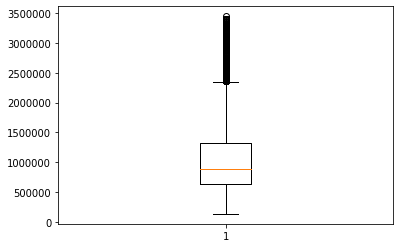

In [48]:
plt.boxplot(final_df["Price"])
plt.show()

In [49]:
final_df['buildingarea_s'] = scaler.fit_transform(final_df[["BuildingArea"]])
final_df['landsize_s'] = scaler.fit_transform(final_df[['Landsize']])
final_df['rooms_scaled'] = scaler.fit_transform(final_df[["Rooms"]])
final_df['distance_scaled'] = scaler.fit_transform(final_df[["Distance"]])
final_df['bathroom_scaled'] = scaler.fit_transform(final_df[["Bathroom"]])

#applying standard scaler to above mentioned features 

In [50]:
dummy = pd.get_dummies(final_df['Regionname'])
dummy.shape

# converting categorical variable Region name into dummies 

(8711, 8)

In [51]:
dummy.rename(columns={'Eastern Metropolitan':'region_1', 'Eastern Victoria':'region_2', 'Northern Metropolitan':'region_3', 'Northern Victoria':'region_4','South-Eastern Metropolitan':'region_5', 'Southern Metropolitan':'region_6',
         'Western Metropolitan':'region_7', 'Western Victoria':'region_8'}, inplace = True)

In [52]:
dummy.head()

,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [53]:
final_df = pd.concat([final_df,dummy],axis=1)

# concatenating dataframe 


In [54]:
final_df.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount',
       'month', 'year', 'monthyear', 'benchmark_bond_yields', 'cost_per_sqmts',
       'age_of_property', 'buildingarea_s', 'landsize_s', 'rooms_scaled',
       'distance_scaled', 'bathroom_scaled', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8'],
      dtype='object')

In [55]:
final_df.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,distance_scaled,bathroom_scaled,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
0,Abbotsford,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,...,-1.28,-0.90,0,0,1,0,0,0,0,0
1,Altona,2,720000.00,13.80,2.00,1.00,2.00,292.00,125.00,2013.00,...,0.38,-0.90,0,0,0,0,0,0,1,0
2,Bentleigh,3,1222500.00,13.00,3.00,2.00,2.00,299.00,181.00,2000.00,...,0.26,0.52,0,0,0,0,0,1,0,0
3,Burwood,3,1755000.00,11.70,3.00,1.00,1.00,931.00,145.00,1970.00,...,0.07,-0.90,0,0,0,0,0,1,0,0
4,Chadstone,4,890000.00,13.60,4.00,3.00,2.00,288.00,158.00,2014.00,...,0.35,1.94,0,0,0,0,0,1,0,0


In [56]:
final_df.to_pickle("final_dataframe.pickle")

## End of data pre-processing and feature engineering